In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

if os.path.isdir("../notebooks/"):
    os.chdir("..")

In [3]:
import json

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from badseeds import seedbank

plt.rcParams["font.family"] = "serif"

In [4]:
# path to config json file containing paths to datasets. change if necessary
CONFIG_PATH = "./config.json"

In [5]:
with open(CONFIG_PATH, "r") as f:
    config = json.load(f)

In [6]:
# Get our gathered seeds
seeds = seedbank.seedbanking(
    config["seeds"]["dir_path"] + "seeds.json",
    index=False,
    filter_bigrams=False,
    filter_short=False,
)

In [7]:
sets_per_paper = np.sort(seeds.groupby("Used in Paper").count()["Seeds ID"].to_numpy())

In [8]:
seeds_per_set = np.sort(seeds["Seeds"].apply(len).to_numpy())

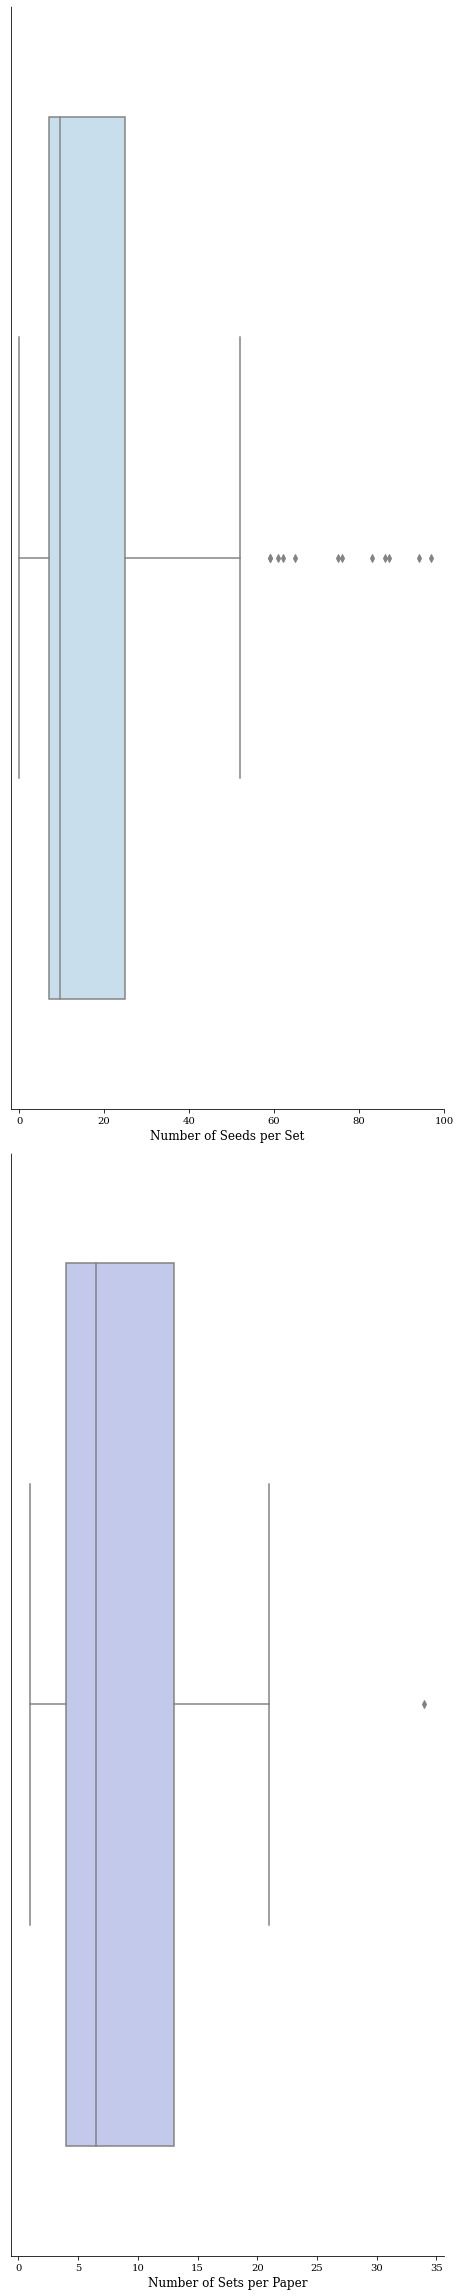

In [12]:
# plot
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(w=6.50127, h=32)

ax1 = sns.boxplot(
    data=seeds_per_set, orient="h", color='#C3DFF2', ax=ax1
)
ax1.set_xlim([-2, 100])
ax1.set_xlabel("Number of Seeds per Set", fontsize=12)
ax1.spines["top"].set_color("white")
ax1.spines["right"].set_color("white")
ax1.set_yticks([])

sns.boxplot(data=sets_per_paper, orient="h", color='#BDC5F0', ax=ax2)
ax2.set_xlabel("Number of Sets per Paper", fontsize=12)
ax2.spines["top"].set_color("white")
ax2.spines["right"].set_color("white")
ax2.set_yticks([])

plt.tight_layout()
plt.show()

In [10]:
# save to latex
fig.savefig("images/fig_1.pdf", bbox_inches="tight")